In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


To understand how the batch FFT works, let's first make an example complex timeseries, which can then be FFT'ed and investigated.

In [110]:
tsamp = 0.000005
tlen = 10.0
t = np.arange(0.0, tlen, tsamp)
freq = 10000.0-50.0*t+100*t**2

In [114]:
cre = 5.0*np.cos(2.0*np.pi*freq*t)+np.random.normal(0.0, 1.0, len(t))
cim = 5.0*np.sin(2.0*np.pi*freq*t)+np.random.normal(0.0, 1.0, len(t))

In [115]:
cin = cre + 1j*cim

(0, 0.0001)

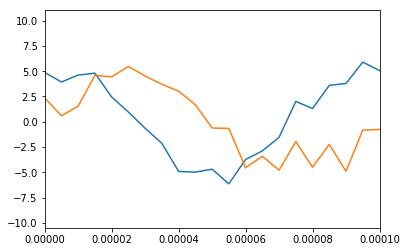

In [116]:
plt.plot(t, np.real(cin))
plt.plot(t, np.imag(cin))
plt.xlim(0,0.0001)

(256, 8928)

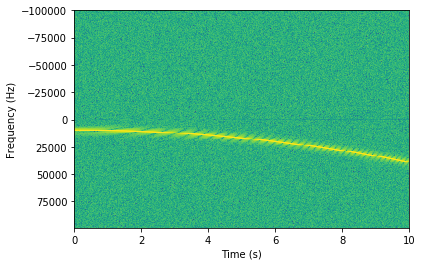

In [117]:
f, t, Sxx = signal.spectrogram(cin, 1.0/tsamp, return_onesided=False)
f = np.fft.fftshift(f)
plt.imshow(np.fft.fftshift(np.log10(Sxx), axes=0), extent = [t[0],t[-1],f[-1],f[0]], aspect='auto', cmap='viridis')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
Sxx.shape

In [118]:
nchan = 256
nsub = int(len(cin)/256)
cout = np.fft.fft(cin[:nchan*nsub].reshape(-1, nchan))

In [119]:
cout.shape

(7812, 256)

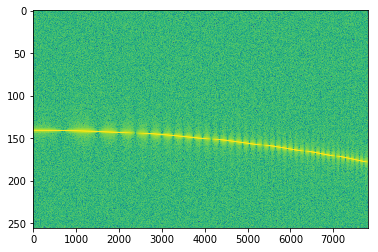

In [126]:
plt.imshow(np.fft.fftshift(np.log10(np.absolute(cout)), axes=1).T, aspect='auto')

In [108]:
np.fft.fftshift?

In [128]:
signal.spectrogram?